In [11]:
import random
import itertools
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


def multiple_restart_partitions(student_ids, num_partition_restarts=6, iteration=0):
    # dictionary to collect all partition steps
    all_partition_steps = {}
    # perform multiple partition steps
    for i in range(num_partition_restarts):
        random.seed(iteration)
        random.shuffle(x=student_ids)
        all_partition_steps[i] = {}
        all_partition_steps[i][0] = set(student_ids[:num_students/2])
        all_partition_steps[i][1] = set(student_ids[num_students/2:])
    
    # score the pairwise occurence
    pairwise_occurences = {}
    
    # for each unique combination of two students
    for student_pair in all_combinations:
        # define each student
        student_A = student_pair[0]
        student_B = student_pair[1]
        
        pair_key = '{}-{}'.format(student_A, student_B)
        
        # allocate a list for the pairwise occurence tracking
        pairwise_occurences[pair_key] = []
        
        # over all the partition steps
        for i, partition in enumerate(all_partition_steps.iteritems()):
            group_A = partition[1][0]
            group_B = partition[1][1]
            # if the combination of students are both in the first group
            if (student_A in group_A) and (student_B in group_A):
                pairwise_occurences[pair_key].append(i)
            # or if the combination of students are both in the second group
            elif (student_A in group_B) and (student_B in group_B):
                pairwise_occurences[pair_key].append(i)
            # otherwise, the combination of students are not in the same group    
            else:
                # break and move on to the next group
                break
        
    total_pairwise_combos = 0
    all_pairwise_combos = []
    num_keys = 0
    for k,v in pairwise_occurences.iteritems():
        all_pairwise_combos.append(len(v))
        total_pairwise_combos += len(v)
        num_keys += 1
            
    return (all_partition_steps, 
            pairwise_occurences, 
            total_pairwise_combos, 
            num_keys, all_pairwise_combos)

def brute_force_optimize(student_ids, all_combinations, 
                         num_partition_restarts, num_optimization_steps, 
                         score_function):
    # brute force a random search solution
    min_score = 1e9
    scores = []
    best_all_pairwise_combos = None
    
    for i in tqdm(range(num_optimization_steps)):    
        (all_partition_steps, 
         pairwise_occurences, 
         total_pairwise_combos,
         num_keys,
         all_pairwise_combos) = multiple_restart_partitions(student_ids,
            num_partition_restarts=num_partition_restarts, iteration=i)
    
        # what is the optimization metric?
        # 1) mean over all pairwise combinations 
        if score_function == 'mean':
            score = np.mean(all_pairwise_combos)
    
        # 2) mean over all pairwise combinations 
        if score_function == 'median':
            score = np.median(all_pairwise_combos)
    
        # 3) total pairwise combinations
        if score_function == 'total':
            score = total_pairwise_combos
            
        if score_function == 'max':
            score = np.max(all_pairwise_combos)

        # Make a list of scores to see histogram
        scores.append(score)

        if score < min_score:
            min_score = score
            # save the partition details
            best_partition_steps = all_partition_steps
            best_all_pairwise_combos = all_pairwise_combos
            best_total_pairwise_combos = total_pairwise_combos
            
    return (scores, min_score, best_partition_steps, 
            best_total_pairwise_combos, best_all_pairwise_combos,
            num_keys)


num_students = 20
student_ids = np.arange(num_students)

# all combinations of pairs of students
all_combinations = list(itertools.combinations(student_ids, 2))

num_partition_restarts = 6
num_optimization_steps = 10000
score_function = 'max'

# Call the main function
(scores, min_score, 
 best_partition_steps, 
 best_total_pairwise_combos, 
 best_all_pairwise_combos,
 num_keys) = brute_force_optimize(student_ids, all_combinations, 
                     num_partition_restarts, num_optimization_steps, 
                     score_function)

print('Number of students: {}'.format(num_students))
print('Number of partition restarts: {}'.format(num_partition_restarts))
print('Number of optimization iterations: {}'.format(num_optimization_steps))
print('Number of unique combinations of two students: {}'.format(num_keys))
print('Total pairwise combinatons over partition: {}'.format(best_total_pairwise_combos))
print('Maximum number overlapping combinations: {}'.format(np.max(best_all_pairwise_combos)))
print('Mean overlapping combinations: {}'.format(np.mean(best_all_pairwise_combos)))
print('Median overlapping combinations: {}'.format(np.median(best_all_pairwise_combos)))

print('Score: {}\n'.format(min_score))

for k,v in best_partition_steps.iteritems():
    print(k, v)

100%|██████████| 10000/10000 [00:16<00:00, 589.04it/s]

Number of students: 20
Number of partition restarts: 6
Number of optimization iterations: 10000
Number of unique combinations of two students: 190
Total pairwise combinatons over partition: 152
Maximum number overlapping combinations: 4
Mean overlapping combinations: 0.8
Median overlapping combinations: 0.0
Score: 4

(0, {0: set([1, 4, 5, 8, 10, 11, 15, 16, 17, 18]), 1: set([0, 2, 3, 6, 7, 9, 12, 13, 14, 19])})
(1, {0: set([2, 3, 5, 7, 10, 13, 14, 15, 16, 17]), 1: set([0, 1, 4, 6, 8, 9, 11, 12, 18, 19])})
(2, {0: set([1, 2, 3, 4, 5, 6, 10, 12, 17, 18]), 1: set([0, 7, 8, 9, 11, 13, 14, 15, 16, 19])})
(3, {0: set([1, 2, 3, 6, 7, 9, 14, 16, 17, 19]), 1: set([0, 4, 5, 8, 10, 11, 12, 13, 15, 18])})
(4, {0: set([0, 1, 2, 5, 6, 7, 11, 12, 18, 19]), 1: set([3, 4, 8, 9, 10, 13, 14, 15, 16, 17])})
(5, {0: set([1, 7, 8, 9, 11, 12, 15, 16, 17, 19]), 1: set([0, 2, 3, 4, 5, 6, 10, 13, 14, 18])})


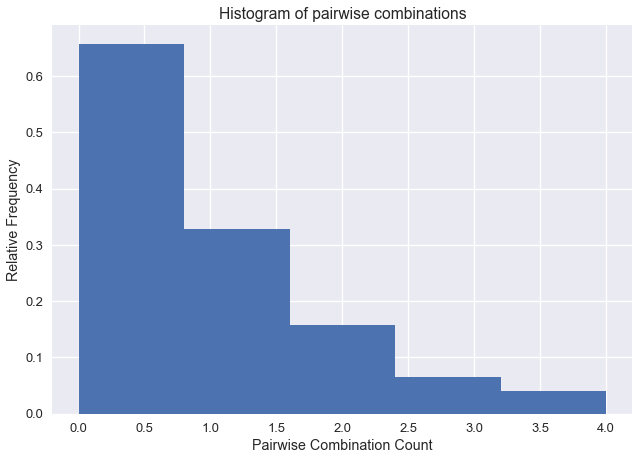

In [22]:
# sns.set(font_scale=6)  # crazy big\n",
sns.set(style="darkgrid", rc={"lines.linewidth": 4})
sns.set_context("talk")
    
plt.figure()
plt.title('Histogram of pairwise combinations')
plt.hist(best_all_pairwise_combos, bins=5, normed=True)
plt.xlabel('Pairwise Combination Count')
plt.ylabel('Relative Frequency')
plt.show()